In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

#Data Loading

In [ ]:
import pandas as pd
link ='https://drive.google.com/open?id=1ntjxiHT6c619MJb5JYjmQtLZAgKsgTrW'

fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('Dataset.csv')

train_news = pd.read_csv('Dataset.csv',encoding= 'unicode_escape')


In [ ]:
print(train_news.shape)
train_news.head()


(2225, 2)


,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print("Checking data qualitites...")
train_news.isnull().sum()
train_news.info()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


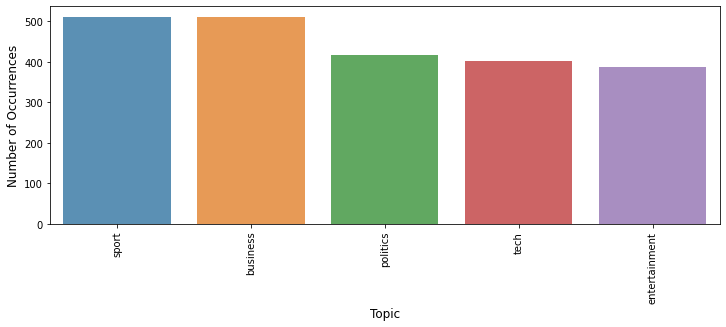

In [ ]:
topic = train_news['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(topic.index, topic.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#Data Preprocessing

In [ ]:

from gensim import utils
from gensim.utils import lemmatize
import gensim.parsing.preprocessing as gsp
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short 
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
        doc = nlp(s)
        s=" ".join([token.lemma_ for token in doc])
       

    return s


In [ ]:
train_news['news'][0]

'China had role in Yukos split-up\n \n China lent Russia $6bn (Â£3.2bn) to help the Russian government renationalise the key Yuganskneftegas unit of oil group Yukos, it has been revealed.\n \n The Kremlin said on Tuesday that the $6bn which Russian state bank VEB lent state-owned Rosneft to help buy Yugansk in turn came from Chinese banks. The revelation came as the Russian government said Rosneft had signed a long-term oil supply deal with China. The deal sees Rosneft receive $6bn in credits from China\'s CNPC.\n \n According to Russian newspaper Vedomosti, these credits would be used to pay off the loans Rosneft received to finance the purchase of Yugansk. Reports said CNPC had been offered 20% of Yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. Analysts said one factor that might have influenced the Chinese decision was the possibility of litigation from Yukos, Yugansk\'s former owner, if CNPC had become a shareholder. Rosneft an

In [ ]:
train_news['news']=train_news['news'].apply(clean_text)

In [ ]:
train_news['news'][0]

'china role yukos split china lend russia help russian government renationalise key yuganskneftegas unit oil group yukos PRON reveal kremlin tuesday russian state bank veb lend state rosneft help buy yugansk turn come chinese bank revelation come russian government rosneft sign long term oil supply deal china deal rosneft receive credit china cnpc accord russian newspaper vedomosti credit use pay loan rosneft receive finance purchase yugansk report cnpc offer yugansk return provide finance company opt long term oil supply deal instead analyst factor influence chinese decision possibility litigation yukos yugansk owner cnpc shareholder rosneft veb decline comment company rosneft cnpc agree pre payment long term delivery russian oil official sergei oganesyan unusual pre payment year announcement help explain rosneft medium sized indebted relatively unknown firm able finance PRON surprise purchase yugansk yugansk sell auction year help yukos pay unpaid taxi fine embattle russian oil giant

#Highlighting Frequent Word for each Category

In [ ]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
#function to grenerate word cloud

def MakeWordCloud(genre,type):
  wordcloud = WordCloud(background_color="black", width = 1000, height = 500).generate(''.join(str(genre['news'])))
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud)
  plt.title(type, fontsize=30)
  plt.axis("off")
  plt.show()

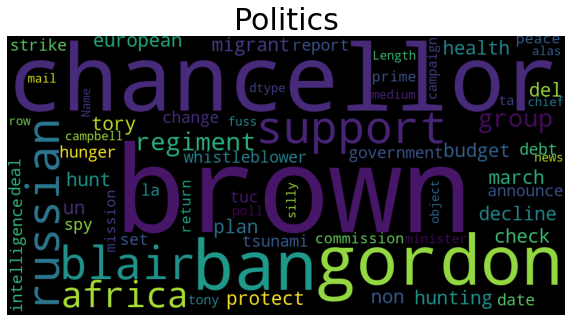

In [ ]:
#politics
politics = train_news[train_news['type'] == 'politics']
MakeWordCloud(politics,"Politics")

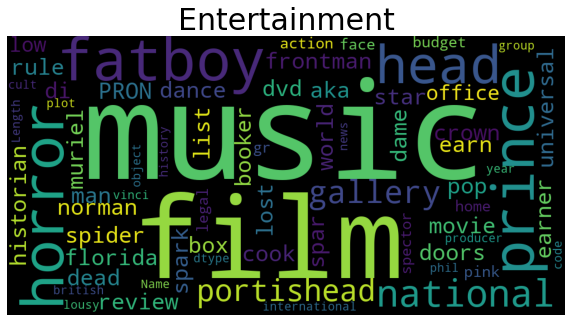

In [ ]:

#entertainment
entertainment = train_news[train_news['type'] == 'entertainment']
MakeWordCloud(entertainment,"Entertainment")

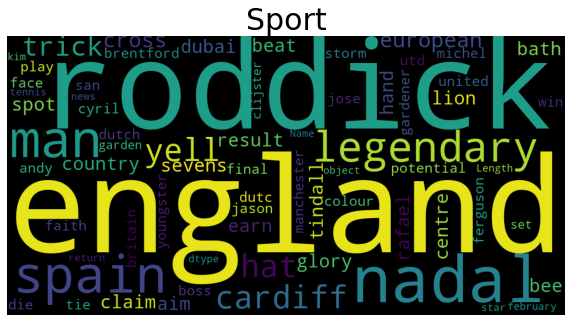

In [ ]:
#sport
sport = train_news[train_news['type'] == 'sport']
MakeWordCloud(sport,"Sport")

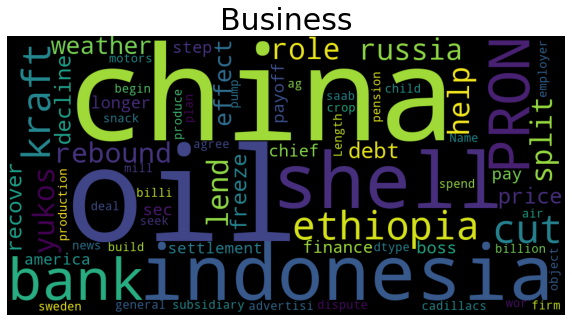

In [ ]:

#business
business = train_news[train_news['type'] == 'business']
MakeWordCloud(business,"Business")

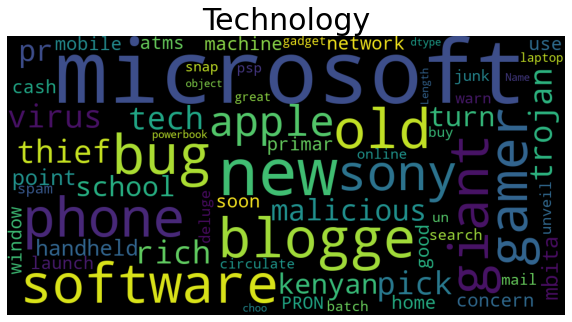

In [ ]:
#technology
technology = train_news[train_news['type'] == 'tech']
MakeWordCloud(technology,"Technology")

In [ ]:

x_train=train_news['news']
y_train=train_news['type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}


In [ ]:
category_to_id = {'business':0,  'entertainment':1, 'politics':2, 'sport':3,'tech':4}
id_to_category = {0: 'business', 1: 'entertainment' , 2: 'politics', 3: 'sport',4: 'tech'}


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.4,random_state=1056)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(1335,)
(1335,)
(890,)
(890,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
model= TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english',)
model.fit(X_train)



TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='latin-1',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
dictionary=dict(zip(model.get_feature_names(),list(model.idf_)))

In [ ]:
import pickle
trainin=pickle.dump(dictionary,open("dict.pkl",'wb'))


In [ ]:
w2v_words= dict()
f = open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    w2v_words[word] = coefs
f.close()


In [ ]:
tfidf_feat=model.get_feature_names()
train_sent_vectors=[]
row=0
for sent in X_train:
  sent_vec=np.zeros(100)
  weight_sum=0
  for word in sent.split():
    if word in w2v_words and word in tfidf_feat:
      vec=w2v_words[word]
      tf_idf=dictionary[word]*(sent.count(word)/len(sent))
      sent_vec+=(vec*tf_idf)
      weight_sum+=tf_idf
  if weight_sum!=0:
    sent_vec/=weight_sum
  train_sent_vectors.append(sent_vec)
  row+=1      


In [ ]:
tfidf_feat=model.get_feature_names()
test_sent_vectors=[]
row=0
for sent in X_test:
  sent_vec=np.zeros(100)
  weight_sum=0
  for word in sent.split():
    if word in w2v_words and word in tfidf_feat:
      vec=w2v_words[word]
      tf_idf=dictionary[word]*(sent.count(word)/len(sent))
      sent_vec+=(vec*tf_idf)
      weight_sum+=tf_idf
  if weight_sum!=0:
    sent_vec/=weight_sum
  test_sent_vectors.append(sent_vec)
  row+=1   
     
X_test=test_sent_vectors

In [ ]:
len(train_sent_vectors)

1335

In [ ]:
# tfidf_sent_vectors[0]

In [ ]:
# tfidf_feat


In [ ]:
# tfidf_sent_vectors
features=np.array(train_sent_vectors)
labels=Y_train

In [ ]:
##dimension reduction 
from sklearn.manifold import TSNE
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) 

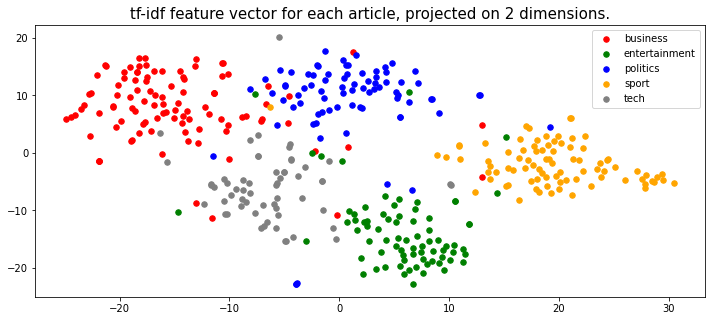

In [ ]:
colors = ['red', 'green', 'blue', 'orange', 'grey']

# Finding points belonging to each category and plot them
plt.figure(figsize=(12,5))
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id)]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("Weighted tf-idf feature vector for each article, projected on 2 dimensions.",fontdict=dict(fontsize=15))
plt.legend()

#Model selection and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC



In [ ]:
models = [   
    RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0),
    SVC(kernel='rbf')
]

In [ ]:
CV =5

#Creating a data frame that will store the results for all 5 trials of the 4 different models

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='f1_weighted', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

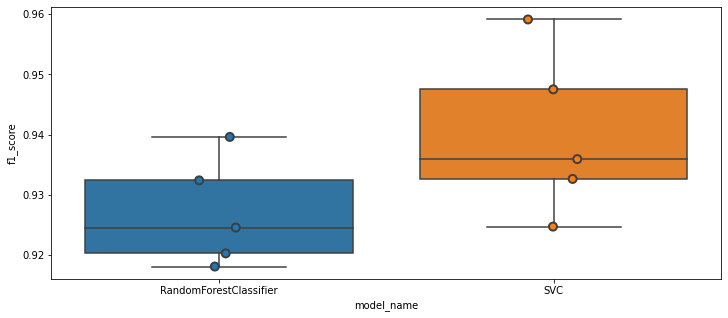

In [ ]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_score'])

import seaborn as sns
plt.figure(figsize=(12,5))
sns.boxplot(x='model_name', y='f1_score', data=cv_df)
sns.stripplot(x='model_name', y='f1_score', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [ ]:
cv_df.groupby('model_name').f1_score.mean()

model_name
RandomForestClassifier    0.926998
SVC                       0.940000
Name: f1_score, dtype: float64

In [ ]:

cv_df

,model_name,fold_idx,f1_score
0,RandomForestClassifier,0,0.918099
1,RandomForestClassifier,1,0.932410
2,RandomForestClassifier,2,0.939629
3,RandomForestClassifier,3,0.924570
4,RandomForestClassifier,4,0.920284
5,SVC,0,0.947533
6,SVC,1,0.959140
7,SVC,2,0.932649
8,SVC,3,0.924736
9,SVC,4,0.935941


In [ ]:
#Making final model for Deployment

svc=SVC(kernel='rbf',probability=True)
svc.fit(features,labels)

X_test=np.array(X_test)
Y_pred=svc.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred, labels=[0,1, 2,]))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       196
           1       0.99      0.94      0.96       142
           2       0.87      0.92      0.89       168

   micro avg       0.91      0.92      0.92       506
   macro avg       0.92      0.92      0.92       506
weighted avg       0.91      0.92      0.92       506



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.9337078651685393


Text(0.5, 15.0, 'Predicted')

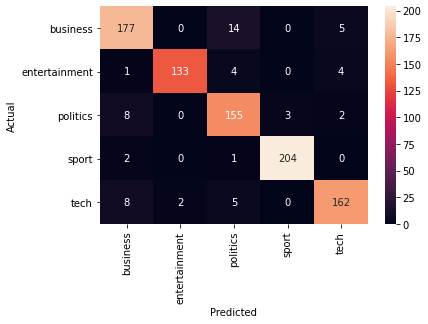

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
lbl=['business',  'entertainment', 'politics', 'sport','tech']
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=lbl, yticklabels=lbl)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:

pickle.dump(svc, open('final_model.pkl','wb'))
